In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split

In [106]:
heart_df=pd.read_csv("/content/heart.csv")

In [107]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
heart_df.shape

(303, 14)

In [109]:
heart_df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [110]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [111]:
heart_df.duplicated().sum()

1

In [112]:
heart_df = heart_df.drop_duplicates()


In [113]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [114]:
column_rename_dict = {
    "age": "Age",
    "sex": "Sex",
    "cp": "Chest_Pain_Type",
    "trtbps": "Resting_Blood_Pressure",
    "chol": "Cholesterol",
    "fbs": "Fasting_Blood_Sugar",
    "restecg": "Resting_ECG",
    "thalachh": "Max_Heart_Rate_Achieved",
    "exng": "Exercise_Induced_Angina",
    "oldpeak": "ST_Depression",
    "slp": "ST_Slope",
    "caa": "Number_of_Major_Vessels",
    "thall": "Thalassemia",
    "output": "Heart_Disease"
}


In [115]:
heart_df.rename(columns= column_rename_dict,inplace = True)

<ipython-input-115-c4b9c32b4b39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df.rename(columns= column_rename_dict,inplace = True)


In [116]:
heart_df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Thalassemia,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
for col in heart_df.columns:
    print(col,"has maximum repeated value percentage :",heart_df[col].value_counts().max()*100/len(heart_df[col]))

Age has maximum repeated value percentage : 6.291390728476821
Sex has maximum repeated value percentage : 68.21192052980132
Chest_Pain_Type has maximum repeated value percentage : 47.35099337748344
Resting_Blood_Pressure has maximum repeated value percentage : 12.251655629139073
Cholesterol has maximum repeated value percentage : 1.9867549668874172
Fasting_Blood_Sugar has maximum repeated value percentage : 85.09933774834437
Resting_ECG has maximum repeated value percentage : 50.0
Max_Heart_Rate_Achieved has maximum repeated value percentage : 3.642384105960265
Exercise_Induced_Angina has maximum repeated value percentage : 67.21854304635761
ST_Depression has maximum repeated value percentage : 32.450331125827816
ST_Slope has maximum repeated value percentage : 46.688741721854306
Number_of_Major_Vessels has maximum repeated value percentage : 57.94701986754967
Thalassemia has maximum repeated value percentage : 54.63576158940398
Heart_Disease has maximum repeated value percentage : 54.

In [118]:
heart_df.describe()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Thalassemia,Heart_Disease
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [119]:
heart_df.Fasting_Blood_Sugar.value_counts()

,count
Fasting_Blood_Sugar,
0,257
1,45


In [120]:
heart_df.Sex.value_counts()

,count
Sex,
1,206
0,96


<Axes: ylabel='count'>

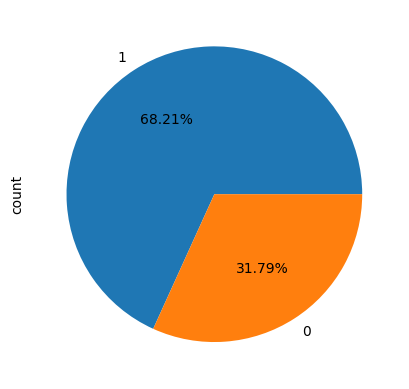

In [121]:
heart_df.Sex.value_counts().plot(kind='pie',autopct='%.2f%%')

In [122]:
heart_df.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression',
       'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia', 'Heart_Disease'],
      dtype='object')

<Axes: xlabel='Chest_Pain_Type'>

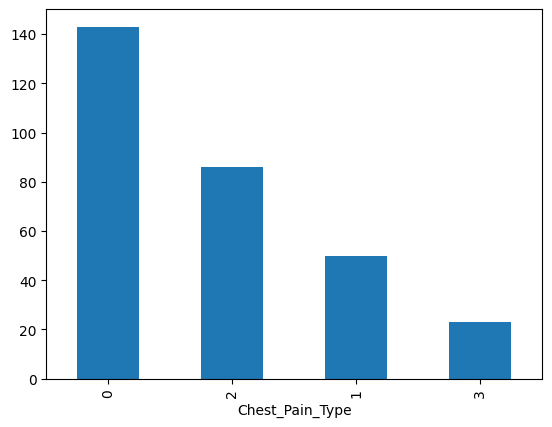

In [123]:
heart_df['Chest_Pain_Type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

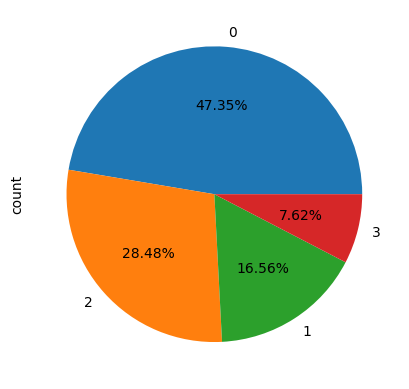

In [124]:
heart_df['Chest_Pain_Type'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: >

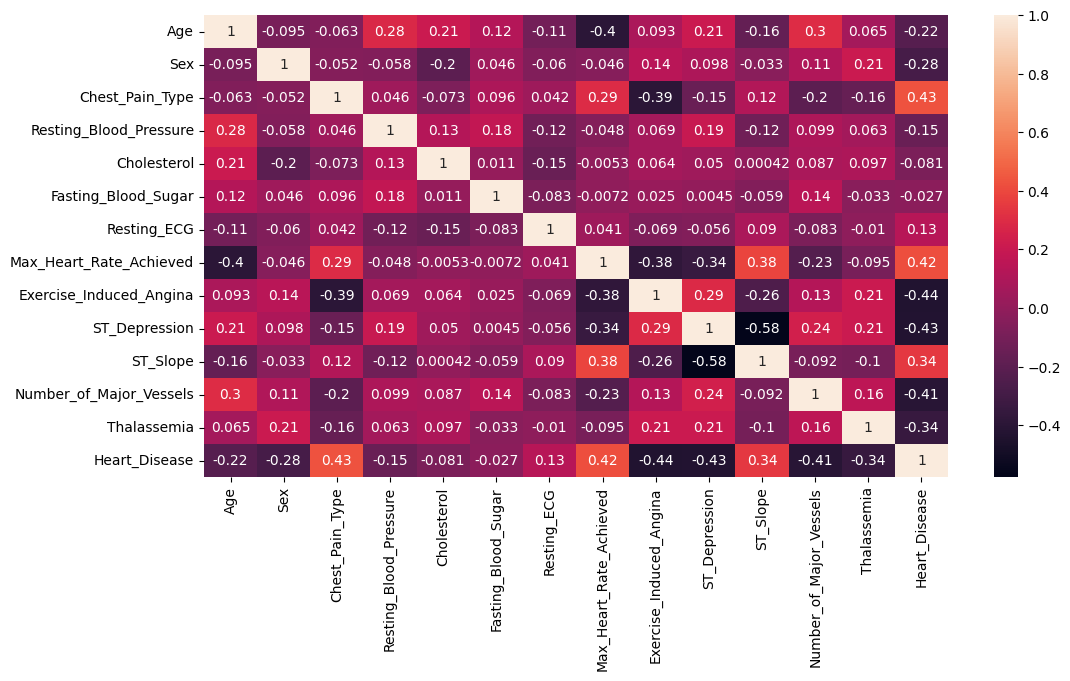

In [125]:
p = heart_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(p,annot=True)

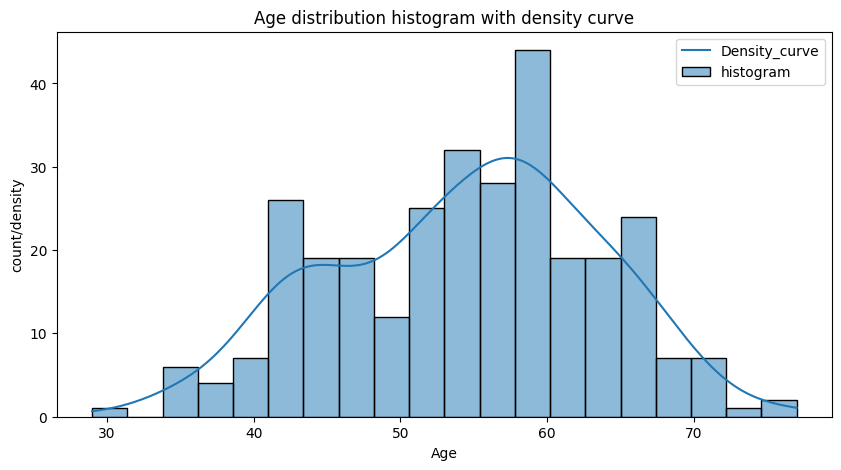

In [126]:
fig,ax =  plt.subplots(figsize=(10,5))
sns.histplot(heart_df['Age'],bins=20,kde=True,ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("count/density")
ax.set_title("Age distribution histogram with density curve")
ax.legend(["Density_curve",'histogram'])

Text(0.5, 1.0, 'Distribution of heart disease by Gender')

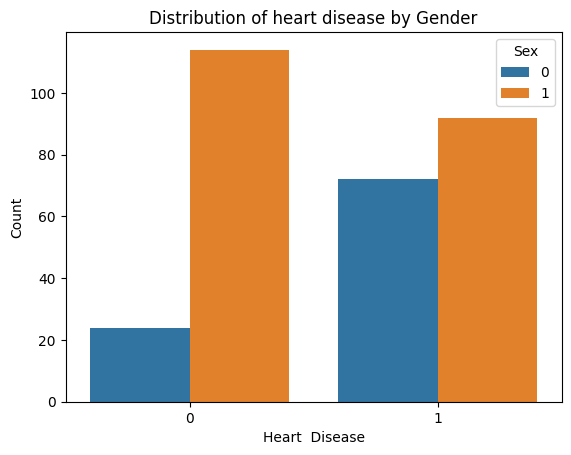

In [127]:
sns.countplot(data = heart_df,x='Heart_Disease',hue = 'Sex')
plt.xlabel('Heart  Disease')
plt.ylabel('Count')
plt.title('Distribution of heart disease by Gender')

<Axes: xlabel='Cholesterol'>

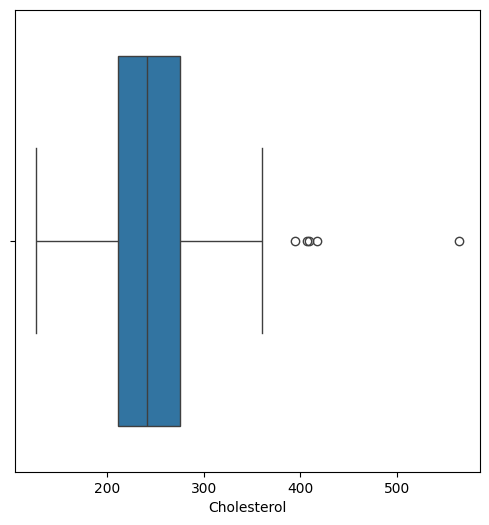

In [128]:
plt.figure (figsize =  (6,6))
sns.boxplot(x='Cholesterol',data=heart_df)

In [129]:
# Calculate IQR for a specific column (e.g., "chol")
def calculate_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR


In [130]:
Q1, Q3, IQR = calculate_iqr(heart_df["Cholesterol"])


In [131]:
# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [132]:
heart_df = heart_df[heart_df['Cholesterol']<upper_bound]

<Axes: xlabel='Cholesterol'>

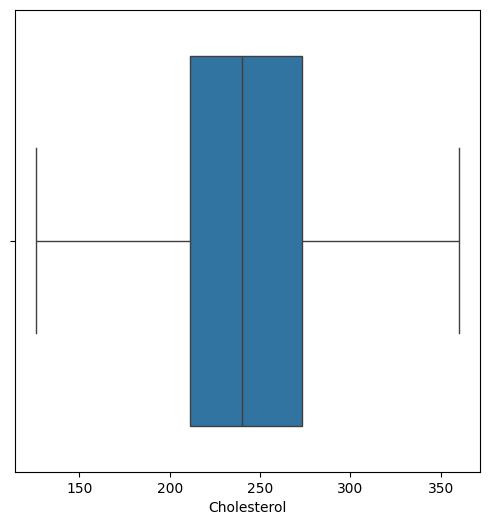

In [133]:
plt.figure (figsize =  (6,6))
sns.boxplot(x='Cholesterol',data=heart_df)

In [134]:
heart_df.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression',
       'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia', 'Heart_Disease'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Cholesterol'>

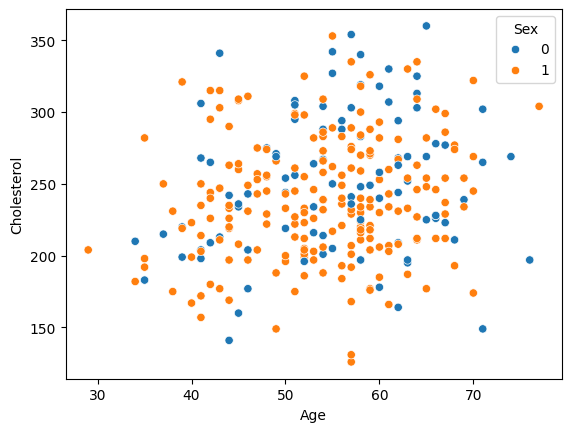

In [135]:
sns.scatterplot(x='Age',y='Cholesterol',hue='Sex',data=heart_df)

Text(0.5, 1.0, 'Distribution of Chest_pain  with Age')

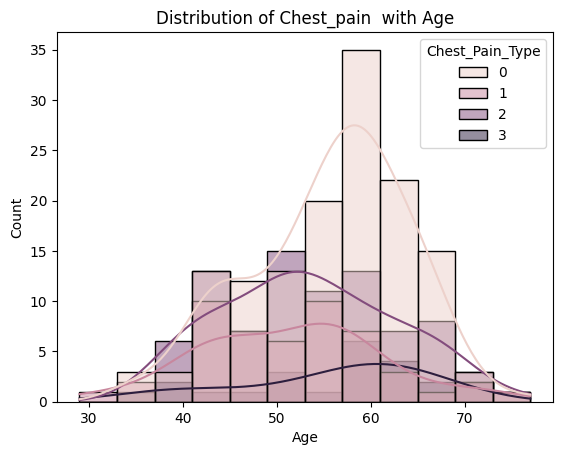

In [136]:
sns.histplot(x=heart_df['Age'],hue=heart_df['Chest_Pain_Type'],kde=True)
plt.title('Distribution of Chest_pain  with Age')

In [137]:
male_count =  heart_df[heart_df['Sex']==1].shape[0]
female_count  = heart_df[heart_df['Sex']==0].shape[0]

total_count =heart_df.shape[0]

print("propogation of male is:",(male_count/total_count)*100)
print("propogation of female is:",(female_count/total_count)*100)



propogation of male is: 69.36026936026936
propogation of female is: 30.63973063973064


In [138]:
heart_df.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression',
       'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia', 'Heart_Disease'],
      dtype='object')

<Axes: xlabel='Resting_Blood_Pressure', ylabel='Cholesterol'>

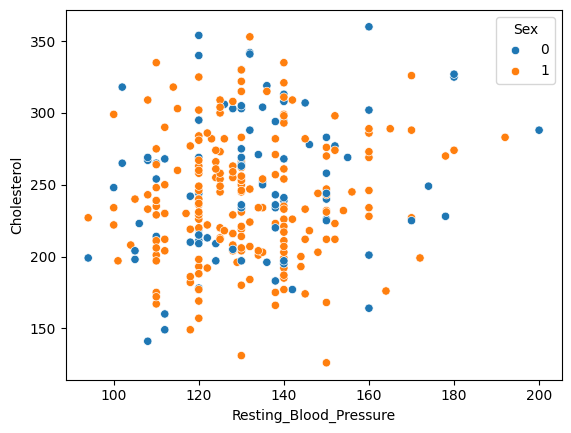

In [139]:
sns.scatterplot(x=heart_df['Resting_Blood_Pressure'],y=heart_df['Cholesterol'],hue=heart_df['Sex'])

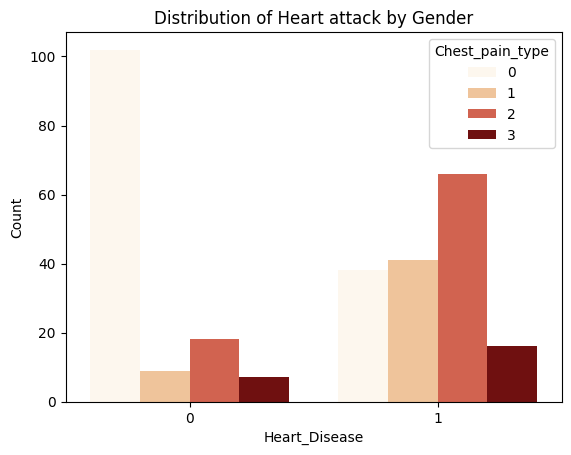

In [140]:
sns.countplot(data = heart_df,x='Heart_Disease',palette='OrRd',hue='Chest_Pain_Type')
plt.title("Distribution of Heart attack by Gender")
plt.xlabel('Heart_Disease')
plt.ylabel("Count")
plt.legend(title="Chest_pain_type")
plt.show()

In [141]:
heart_df['Resting_Blood_Pressure'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [142]:
slope_st_segment =  heart_df[ 'ST_Slope']
num_of_vessels  =  heart_df['Number_of_Major_Vessels']

corr_cofficient = slope_st_segment.corr(num_of_vessels)
print("correlation cofficient",corr_cofficient)

correlation cofficient -0.0901545576268126


In [143]:
abnormalities_df = heart_df[heart_df['ST_Depression'] == 1] # Assuming 1 represents ST-T wave abnormalities
# Calculate the average age of individuals with ST-T wave abnormalities
average_age_abnormalities = abnormalities_df['Age'].mean()
print(f"The average age of individuals who experienced ST-T wave abnormalities during the stress test is: {average_age_abnormalities}")

The average age of individuals who experienced ST-T wave abnormalities during the stress test is: 58.5


In [144]:
angina_df = heart_df[heart_df['Exercise_Induced_Angina'] == 1] # Assuming 1 represents exercise-induced angina
# Calculate the average cholesterol level of individuals with exercise-induced angina
average_cholesterol_angina = angina_df['Cholesterol'].mean()
print(f"The average cholesterol level among individuals who experienced exercise-induced angina during the stress test is:{average_cholesterol_angina}")

The average cholesterol level among individuals who experienced exercise-induced angina during the stress test is:249.6326530612245


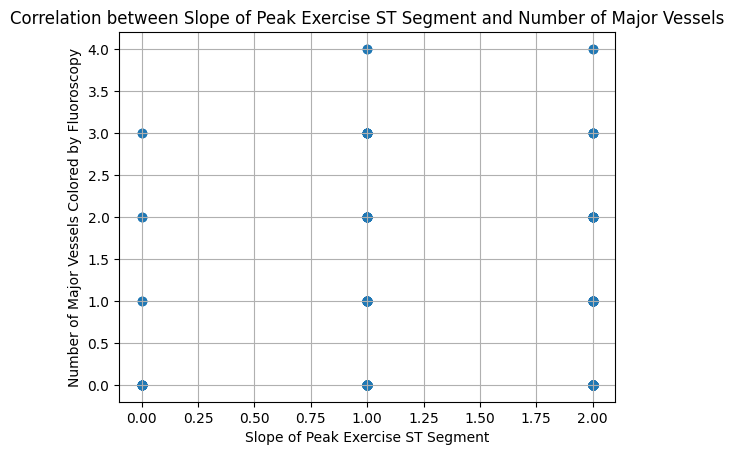

In [145]:
# Create a scatterplot
plt.scatter(slope_st_segment, num_of_vessels)
plt.xlabel('Slope of Peak Exercise ST Segment')
plt.ylabel('Number of Major Vessels Colored by Fluoroscopy')
plt.title('Correlation between Slope of Peak Exercise ST Segment and Number of Major Vessels')
plt.grid(True)
plt.show()

In [146]:
asymptomatic_df = heart_df[heart_df['Chest_Pain_Type'] == 3] # 3 represents asymptomatic chest pain
typical_angina_df = heart_df[heart_df['Chest_Pain_Type'] == 0] # 0 represents typical angina
# Calculate summary statistics
mean_fasting_sugar_asymptomatic = asymptomatic_df['Fasting_Blood_Sugar'].mean()
mean_fasting_sugar_typical_angina = typical_angina_df['Fasting_Blood_Sugar'].mean()
print(f"Mean fasting blood sugar level for individuals with asymptomatic chest pain: {mean_fasting_sugar_asymptomatic:.2f}")
print(f"Mean fasting blood sugar level for individuals with typical angina: {mean_fasting_sugar_typical_angina:.2f}")

Mean fasting blood sugar level for individuals with asymptomatic chest pain: 0.22
Mean fasting blood sugar level for individuals with typical angina: 0.13


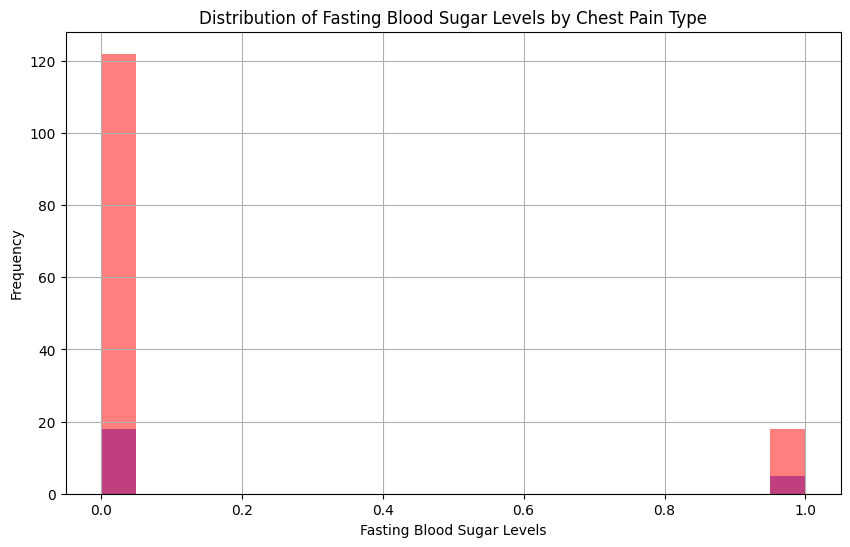

In [147]:
# Visualize the distributions
plt.figure(figsize=(10, 6))
plt.hist(asymptomatic_df['Fasting_Blood_Sugar'], bins=20, alpha=0.5, label='Asymptomatic Chest Pain', color='blue')
plt.hist(typical_angina_df['Fasting_Blood_Sugar'], bins=20, alpha=0.5, label='Typical Angina', color='red')
plt.xlabel('Fasting Blood Sugar Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Fasting Blood Sugar Levels by Chest Pain Type')
plt.grid(True)

In [148]:
heart_df.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression',
       'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia', 'Heart_Disease'],
      dtype='object')

In [150]:
x = heart_df.drop(columns = 'Heart_Disease')
y = heart_df['Heart_Disease']

In [151]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state = 2)

In [152]:
print(x.shape,X_train.shape,X_test.shape)

(297, 13) (237, 13) (60, 13)


#Model training

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
lrf =  LogisticRegression()
lrf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Model Evaluation

In [155]:
from  sklearn.metrics import  confusion_matrix,classification_report,accuracy_score

In [156]:
X_train_prediction =  lrf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [157]:
print("accuracy on training data:",training_data_accuracy)

accuracy on training data: 0.8438818565400844


In [158]:
X_test_prediction = lrf.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("testing data accuracy:",testing_data_accuracy)

testing data accuracy: 0.8833333333333333


#building a predictive system

In [160]:
input_data  =  (63,	1,	3,	145,	233,	1,	0,	150,	0	,2.3,	0,	0,	1	)

input_data_array = np.asarray(input_data)

input_data_reshape  = input_data_array.reshape(1,-1)

prediction = lrf.predict(input_data_reshape)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [162]:
import  pickle

pickle.dump(lrf, open('model1.pkl', 'wb'))
print("Model saved successfully.")


Model saved successfully.


In [163]:
if hasattr(lrf, "classes_"):
    print("Model is fitted. Saving model...")
else:
    print("Model is not fitted. Please fit the model before saving.")


Model is fitted. Saving model...


In [ ]:
python -m  streamlit run heart.py